<a href="https://colab.research.google.com/github/IshaPatro/Investopedia-Knowledge-Graph/blob/main/Knowledge_Graph_Investopedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
import sys

!{sys.executable} -m pip install pip install pandas
!{sys.executable} -m pip install pip install datasets
!{sys.executable} -m pip install pip cache purge
!{sys.executable} -m pip install pip install networkx
!{sys.executable} -m spacy download en_core_web_sm
!{sys.executable} -m pip install pip install transformers torch
!{sys.executable} -m pip install pip install sentence-transformers
!{sys.executable} -m pip install pip install transformers datasets pandas torch
!{sys.executable} -m pip install pip install xz
!{sys.executable} -m pip install pip install lzma
!{sys.executable} -m pip install pip install pylzma
!{sys.executable} -m pip install pip install --upgrade datasets
!{sys.executable} -m pip install pip install -r requirements.txt;
!{sys.executable} -m pip install pip install transformers
!{sys.executable} -m pip install pip install mpld3

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install
ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install
  Preparing metadata (setup.py) ... done
  Created wheel for cache: filename=cache-1.0.3-py3-none-any.whl size=3111 sha256=7a7aa3c97fc7396de8baeb3569207777ae400039982aa59f645452cb67afbcd1
  Stored in directory: /root/.cache/pip/wheels/0f/63/b7/7e93d9dea4d2f8d94ea256489bcd4bbae5ef6c01c31198647d
Successfully built cache
ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab not

# Fetch Scraped Investopedia Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('investopediaScrapper.csv')
df.head()

,Term,Definition,URL
0,"10-K: Definition, What's Included, Instruction...",A 10-K is a comprehensive report filed annuall...,https://www.investopedia.com/terms/1/10-k.asp
1,"10-K Wrap: What It Is, How It Works, Elements",A 10-K wrap is part of a larger annual perform...,https://www.investopedia.com/terms/1/10k-wrap.asp
2,10-Year US Treasury Note: What It Is and Inves...,Treasury notes (T-notes) have maturities of up...,https://www.investopedia.com/terms/1/10-yeartr...
3,What Does 1%/10 Net 30 Mean in a Bill's Paymen...,A 1%/10 net 30 deal is when a 1% discount is o...,https://www.investopedia.com/terms/1/1-10net30...
4,"0x Protocol: What it Means, How it Works, Goals",The 0x protocol is an open protocol that enabl...,https://www.investopedia.com/terms/1/0x-protoc...


# Select Topic

In [ ]:
topic = input('Enter the Topic for Knowledge Graph: ')
print(f"Entered title %s - ",topic)

Enter the Topic for Knowledge Graph: Coupon
Entered title %s -  Coupon


In [ ]:
df = df[(df['Term'].str.contains(topic, case=False)) | (df['Definition'].str.contains(topic, case=False))]
df.head()

,Term,Definition,URL
36,"48-Hour Rule: What It is, How It Works, Example",The 48-hour rule refers to a part of the mortg...,https://www.investopedia.com/terms/1/48-hour-r...
429,"Bearer Share: Definition, Example, Risks, and ...",Bearer shares are unregistered equity securiti...,https://www.investopedia.com/terms/b/bearer_sh...
430,"Bearer Bond: Definition, How It Works, and Why...",A bearer bond is a physical certificate with c...,https://www.investopedia.com/terms/b/bearer_bo...
506,Bonds: How They Work and How To Invest,A bond is referred to as a fixed-income instru...,https://www.investopedia.com/terms/b/bond.asp
507,"Bond Discount: Definition, Example, Vs. Premiu...",Bond discount is the amount by which the marke...,https://www.investopedia.com/terms/b/bond-disc...


In [ ]:
df['Term'] = df['Term'].str.split(':').str[0]
df['Term'] = df['Term'].str.split('?').str[0]
df.size

<ipython-input-10-4b5d1f35721f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Term'] = df['Term'].str.split(':').str[0]
<ipython-input-10-4b5d1f35721f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Term'] = df['Term'].str.split('?').str[0]


75

# Pretrain Model

In [17]:
import pandas as pd

trainingDf = pd.read_csv('FineTuneModel.csv')
trainingDf = trainingDf.to_json('training_data.json', orient='records', lines=True)
trainingDf

In [18]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForTokenClassification.from_pretrained('bert-base-uncased')

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import json
import torch
from torch.utils.data import Dataset
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

class RelationshipDataset(Dataset):
    def __init__(self, file_path, tokenizer):
        self.data = []
        self.tokenizer = tokenizer

        with open(file_path, 'r') as file:
            for line in file:
                item = json.loads(line)
                if all(key in item for key in ('Definition', 'Head', 'Relation', 'Tail')):
                    text = f"{item['Definition']} {item['Head']} {item['Relation']} {item['Tail']}"
                    self.data.append({"text": text, "label": item.get('label', 0)})
                else:
                    print(f"Missing columns in item: {item}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        inputs = self.tokenizer(
            item['text'],
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        inputs = {key: val.squeeze() for key, val in inputs.items()}
        inputs['labels'] = torch.tensor(item['label'])
        return inputs


tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
train_dataset = RelationshipDataset('training_data.json', tokenizer)
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="no",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss


Step,Training Loss


In [ ]:
model.save_pretrained('./results')
tokenizer.save_pretrained('./results')

# Uncovering Relationships with LLM Models

In [ ]:
import pandas as pd
from transformers import pipeline

In [ ]:
import pandas as pd
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

model_path = './results'
tokenizer_path = 'bert-base-uncased'

model = AutoModelForTokenClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

nli_pipeline = pipeline('zero-shot-classification', model=model, tokenizer=tokenizer)
qa_pipeline = pipeline('question-answering', model='distilbert-base-cased-distilled-squad')

def extract_relationships(term, definition, threshold=0.2):
    try:
        isrelated_statement = f"The definition '{definition}' is related to the term '{term}'."
        labels = ["yes", "no"]
        result = nli_pipeline(isrelated_statement, candidate_labels=labels)

        if result['scores'][0] >= threshold and result['labels'][0] == 'yes':
            tail_question = f"Identify the tail for definition: {definition}. Ensure the term is a noun phrase. Limit the response to 5 words."
            tail = qa_pipeline(question=tail_question, context=definition)

            relationship_question = f"Describe the relationship between head: '{term}' and tail: '{tail['answer']}' with a single word. This word should be a verb or an adjective."
            relationship = qa_pipeline(question=relationship_question, context=definition)

            return {
                'Head': term,
                'Relation': relationship['answer'],
                'Tail': tail['answer']
            }
    except Exception as e:
        print(f"Error: {e}")
        return None

# Extract relationships
relation_data = []

for index, row in df.iterrows():
    term = row['Term']
    definitions = str(row['Definition']).split('\n')
    for definition in definitions:
        relationship = extract_relationships(term, definition)
        if relationship:
            relation_data.append(relationship)


relation_data = [entry for entry in relation_data if entry is not None]
relation_df = pd.DataFrame(relation_data).dropna().reset_index(drop=True)
relation_df.head(20)


In [ ]:
relation_df.head()

In [ ]:
relation_df = relation_df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

relation_df['is_duplicate'] = relation_df.apply(lambda row:
    (row['Head'].lower() == row['Relation'].lower()) or
    (row['Head'].lower() == row['Tail'].lower()) or
    (row['Relation'].lower() == row['Tail'].lower()),
    axis=1
)
relation_df = relation_df[~relation_df['is_duplicate']]

relation_df = relation_df.drop(columns=['is_duplicate'])

relation_df['Head'] = relation_df['Head'].str.split(':').str[0]
relation_df['Head'] = relation_df['Head'].str.split('?').str[0]
relation_df

In [25]:
relation_df.size

12

In [ ]:
topicsCovered = len(relation_df['Head'].unique())
print(f'Number of topics to be covered: {topicsCovered}')

# Knowledge Graph

In [26]:
!pip install mpld3
import os
import networkx as nx
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt

In [31]:
G = nx.Graph()
for _, row in relation_df.iterrows():
  G.add_edge(row['Head'], row['Tail'], label=row['Relation'])

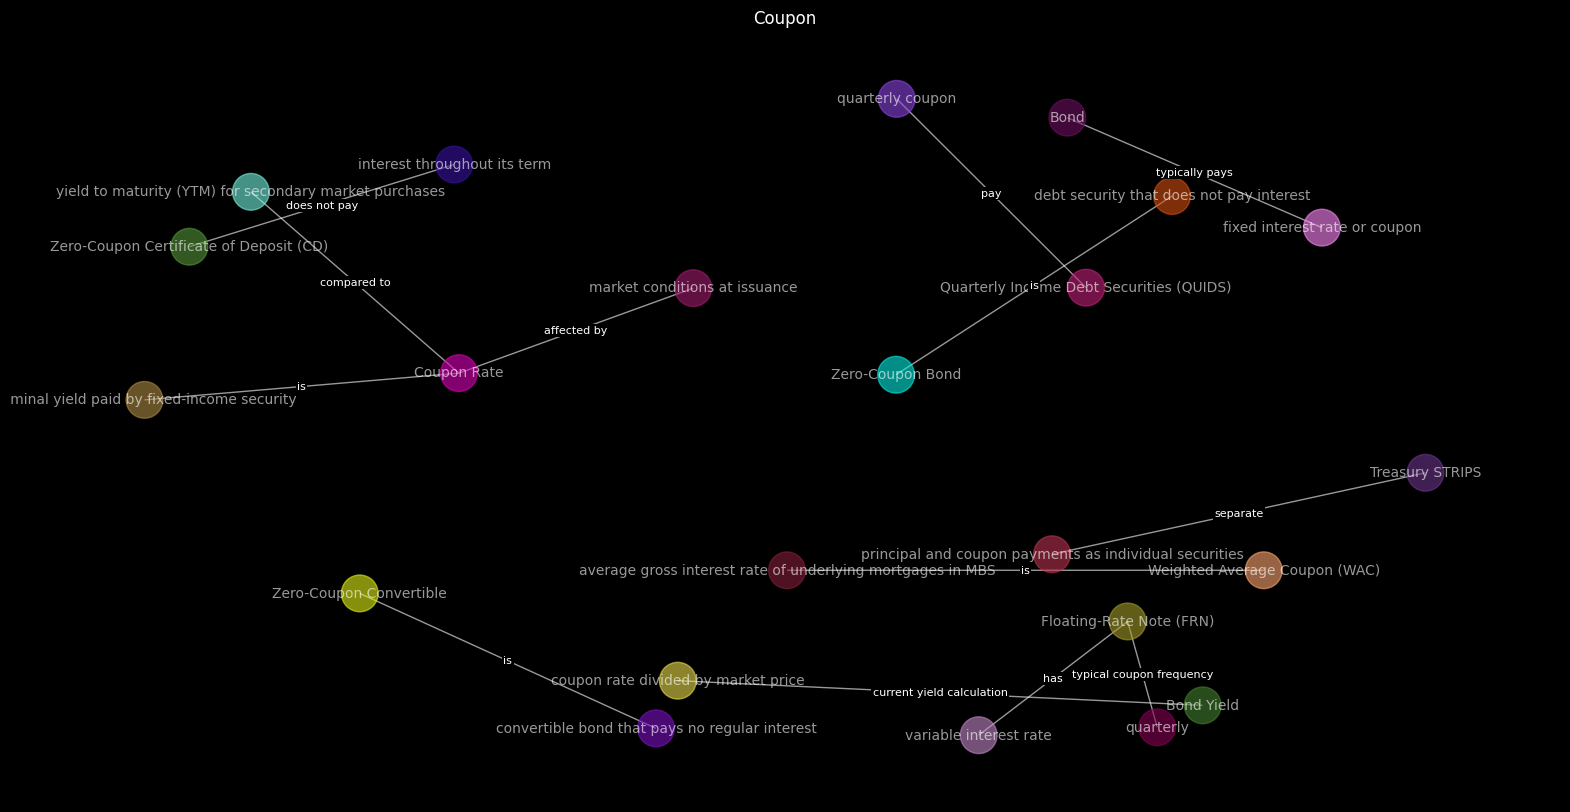

768

In [33]:
def random_color():
    return [random.random() for _ in range(3)]

node_colors = [random_color() for _ in range(len(G.nodes))]
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')

fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=node_colors, edge_color='white', alpha=0.6, ax=ax, font_color='white')

for (n1, n2), label in labels.items():
    x1, y1 = pos[n1]
    x2, y2 = pos[n2]
    x, y = (x1 + x2) / 2, (y1 + y2) / 2
    plt.text(x, y, label, fontsize=8, color='white', ha='center', va='center', bbox=dict(facecolor='black', edgecolor='none', pad=1))

plt.title(topic, color='white')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(False)


fig.patch.set_facecolor('black')
ax.set_facecolor('black')
image_path = f'{topic}.png'
plt.savefig(image_path, facecolor=fig.get_facecolor())
plt.show()
os.system(f'xdg-open {image_path}')

In [34]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
node_names = list(G.nodes())
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

Number of nodes: 23
Number of edges: 13
Ratio edges to nodes: 0.57


# Store Data in Obsidian

In [39]:
vault_path = f'/Users/isha/Documents/Obsidian/{topic}/{topic})'

In [ ]:
for file in os.listdir(vault_path):
    if file.endswith(".md"):
        os.remove(os.path.join(vault_path, file))

In [ ]:
import os

for index, row in df.iterrows():
    if row['Term'] in relation_df['Head'].values:
        file_name = f"{row['Term'].replace(' ', '_').replace('/', '_').replace(':', '_')}.md"
        definition_lines = row['Definition'].split('/n')
        bullet_points = '\n'.join(f"* {line}" for line in definition_lines)
        tag = "#HeadWithDefinition"
        file_content = f"# {row['Term']}\n\n{bullet_points}\n\n[More Info]({row['URL']})\n\n{tag}"
        file_path = os.path.join(vault_path, file_name)
        try:
            with open(file_path, 'w') as file:
                file.write(file_content)
        except OSError as e:
            print(f"Error writing to file {file_path}: {str(e)}")


In [ ]:
for Tail in relation_df['Tail'].unique():
    Tail_df = relation_df[relation_df['Tail'] == Tail]
    content = f"# {Tail}\n\n### Links to Heads\n"
    for index, row in Tail_df.iterrows():
        Head_file_name = row['Head'].replace(" ", "_").replace("\n", "").replace("/", "_") + ".md"
        content += f"- {row['Relation']} [[{Head_file_name}|{row['Head']}]]\n"

    tag = "#Tail"
    content += f"\n\n{tag}"

    Tail_file_name = Tail.replace(' ', '_').replace("\n", "").replace("/", "_")
    file_path = os.path.join(vault_path, f"{Tail_file_name}.md")
    try:
        with open(file_path, 'w') as file:
            file.write(content)
    except OSError as e:
        print(f"Error writing to file {file_path}: {str(e)}")
